## Fazendo import de bibliotecas e tratando dados

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
dataset = pd.read_csv('lm01.csv', low_memory=False)
dataset.drop(['TSHDSBRSGF', 'SD3', 'RHX','RHN', 'RVG','WTE'], axis=1, inplace=True)
dataset.drop(['SNF','SND','FT','FB','FTI', 'ITH', 'PGT'], axis=1, inplace=True)
dataset.drop(['PoorWeather', 'Snowfall', "STA", 'DR', 'SPD'], axis=1, inplace=True)
dataset.drop(['YR', 'MO', 'DA'], axis=1, inplace=True)
corr = dataset.corr()

## Identificando correlações lineares no dataset

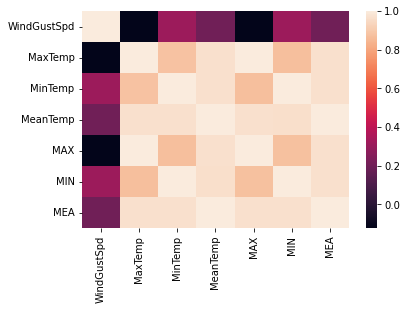

In [3]:
sns.heatmap(corr);

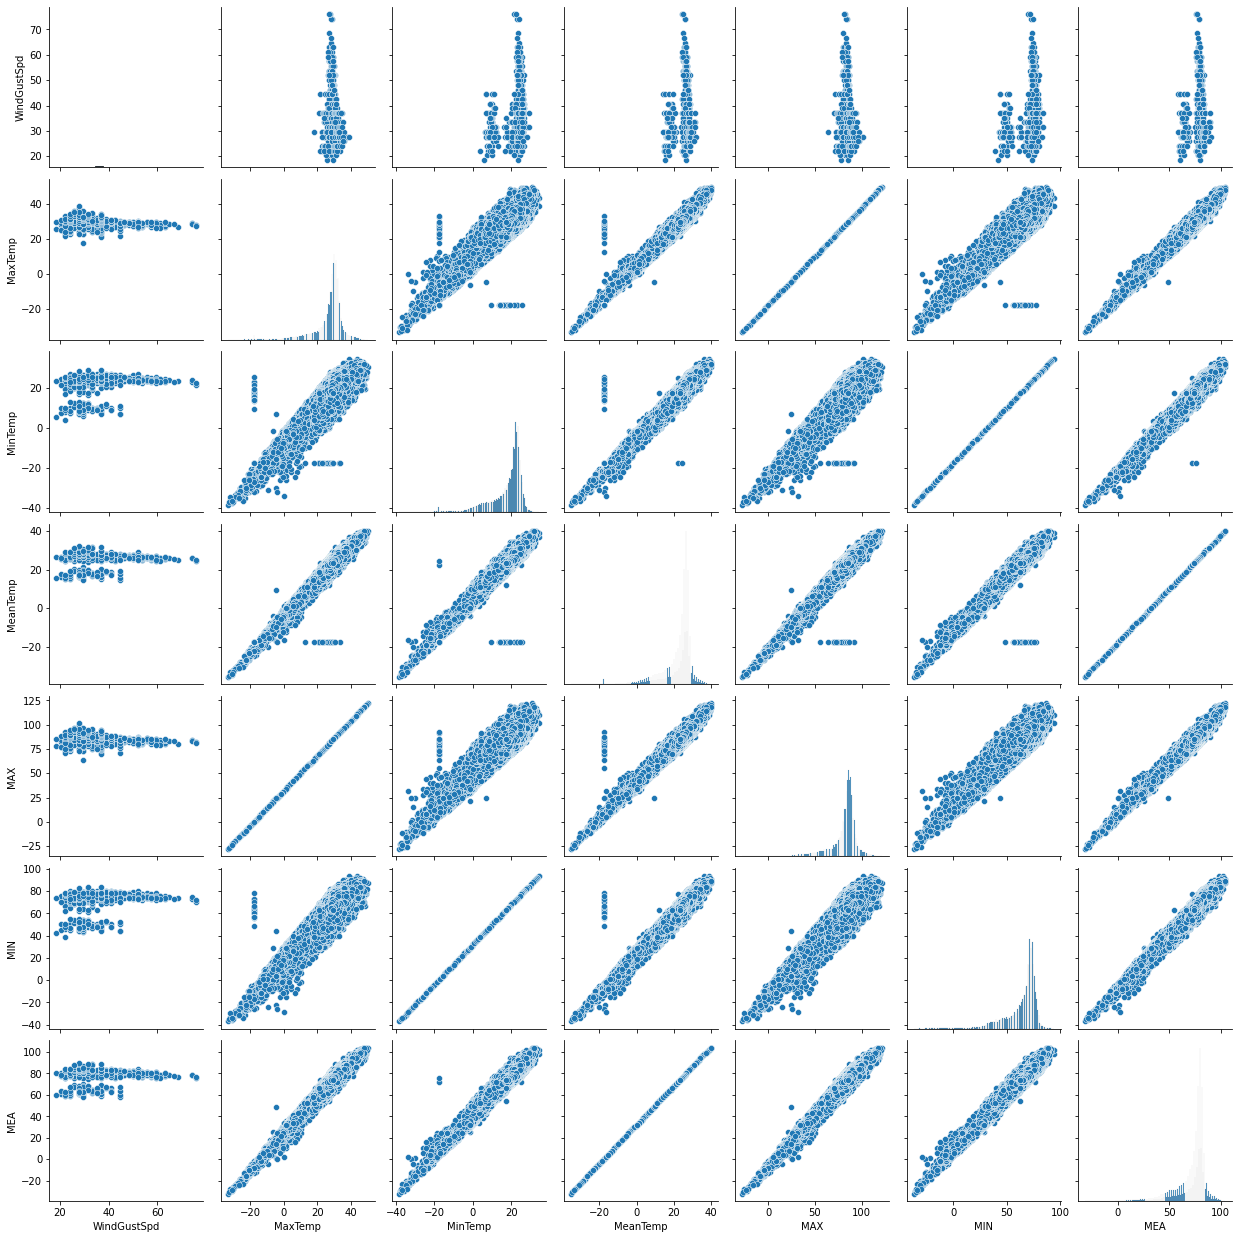

In [4]:
sns.pairplot(dataset);

## Tratando de dados filtrados

**Obs:** Na hora de passar as colunas para treino e teste, as colunas **não podem ter NaN e strings**, logo as colunas WindGustSpd e Precipt foram **deletadas** do dataset oficial

In [5]:
dataset['WindGustSpd'].unique()

array([   nan, 29.632, 59.264, 50.004, 40.744, 51.856, 44.448, 57.412,
       53.708, 42.596, 62.968, 68.524, 61.116, 46.3  , 38.892, 55.56 ,
       31.484, 37.04 , 74.08 , 64.82 , 48.152, 35.188, 27.78 , 33.336,
       20.372, 22.224, 24.076, 25.928, 75.932, 66.672, 18.52 ])

In [6]:
X = dataset[['MaxTemp','MeanTemp']]
y = dataset['MinTemp']

**Obs II: X**  vai ser sempre as variáveis em que eu vou me **basear** e **Y** vai ser sempre o modelo que eu quero **prever.**

## Treinando e compreendendo os resultados:

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

**Obs III:** Intercepto é o quando o eixo X **encontra (cruza)** o eixo Y

In [12]:
print(model.intercept_)

-0.13796331887223445


In [13]:
print(model.coef_)

[-0.89313794  1.87779535]


In [14]:
coeficientes = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
coeficientes

,Coeficiente
MaxTemp,-0.893138
MeanTemp,1.877795


**Obs IV:** O coeficiente significa que a cada um grau mínimo subido, a minha temperatura diminui em 0,89 e a minha temperatura média aumenta em 1.87

## Identificando o quão bom foi o seu modelo

In [15]:
y_pred = model.predict(X_test)

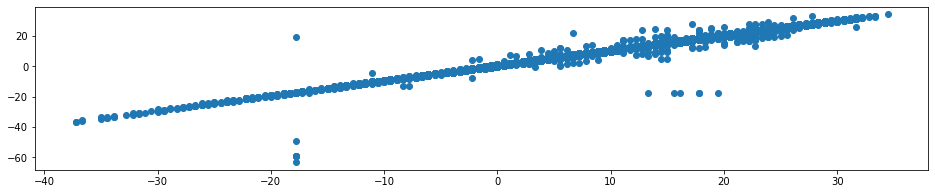

In [16]:
plt.figure(figsize=(16, 3))
plt.scatter(y_test, y_pred);

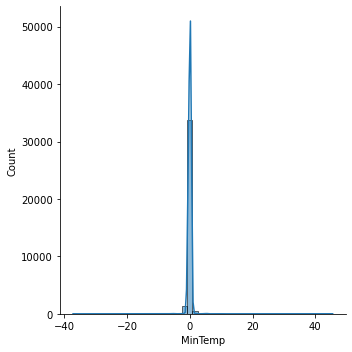

In [17]:
sns.displot(y_test - y_pred, kde=True,  bins=50)

In [18]:
from sklearn import metrics

**MAE:** Calcula a média absoluta que y_pred erra em relação ao y_test a não penaliza outliers. Ele vai de zero a infinito **Ponto negativo:** Nao leva em consideração os itens que sairam da média. 

![alt text](https://www.rocketsource.co/wp-content/uploads/2019/09/MachineLearningModels-45.png "Title")

**RMSE:** Calcula a média do desvio padrão entre o y_pred e o y_test. Assim como o MAE, vai de zero a infinito

![alt text](http://www.aimlfront.com/images/rmse1.png "Title")

**MSE:** Faz (y_pred - y_test)²/n. Penaliza e põe em evidencia valores que passam longe da média (Outliers). Quanto menor ou perto de zero melhor

![alt text](https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/11/Differences-between-MSE-and-RMSE-1-i2tutorials.jpg "Title")

In [19]:
print(f'Erro médio absoluto (MAE) = {round(metrics.mean_absolute_error(y_test, y_pred), 2)}')
print(f'Erro médio quadrático (MSE) = {round(metrics.mean_squared_error(y_test, y_pred), 2)}')
print(f'Raiz do erro médio quadrado (RMSE) = {round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2)}')

Erro médio absoluto (MAE) = 0.39
Erro médio quadrático (MSE) = 0.81
Raiz do erro médio quadrado (RMSE) = 0.9


### R² - R quadrado (R2 score)

**R2 score:** Calcula o quanto o seu modelo foi melhor em relação à media. Nesse caso, 98% melhor

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y_test, y_pred)

0.9882203028854397